Deep Learning
=============

Assignment 3
------------

Previously in `2_fullyconnected.ipynb`, you trained a logistic regression and a neural network model.

The goal of this assignment is to explore regularization techniques.

In [101]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
import matplotlib.pyplot as plt

First reload the data we generated in `1_notmnist.ipynb`.

In [2]:
pickle_file = 'notMNIST.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_labels = save['train_labels']
  valid_dataset = save['valid_dataset']
  valid_labels = save['valid_labels']
  test_dataset = save['test_dataset']
  test_labels = save['test_labels']
  del save  # hint to help gc free up memory
  print('Training set', train_dataset.shape, train_labels.shape)
  print('Validation set', valid_dataset.shape, valid_labels.shape)
  print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 28, 28) (200000,)
Validation set (10000, 28, 28) (10000,)
Test set (10000, 28, 28) (10000,)


Reformat into a shape that's more adapted to the models we're going to train:
- data as a flat matrix,
- labels as float 1-hot encodings.

In [3]:
image_size = 28
num_labels = 10

def reformat(dataset, labels):
  dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)
  # Map 1 to [0.0, 1.0, 0.0 ...], 2 to [0.0, 0.0, 1.0 ...]
  labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
  return dataset, labels
train_dataset, train_labels = reformat(train_dataset, train_labels)
valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 784) (200000, 10)
Validation set (10000, 784) (10000, 10)
Test set (10000, 784) (10000, 10)


In [4]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

---
Problem 1
---------

Introduce and tune L2 regularization for both logistic and neural network models. Remember that L2 amounts to adding a penalty on the norm of the weights to the loss. In TensorFlow, you can compute the L2 loss for a tensor `t` using `nn.l2_loss(t)`. The right amount of regularization should improve your validation / test accuracy.

---

In [141]:
beta = 1e-3

loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(784,)))
model.add(tf.keras.layers.Dense(784,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(beta)))
model.add(tf.keras.layers.Dense(10))
model.compile(optimizer='adam',loss=loss_fn,metrics=['accuracy',loss_fn])

linear_model = tf.keras.Sequential()
linear_model.add(tf.keras.layers.InputLayer(input_shape=(784)))
linear_model.add(tf.keras.layers.Dense(10,kernel_regularizer=tf.keras.regularizers.l2(beta)))
linear_model.compile(optimizer='adam',loss=loss_fn,metrics=['accuracy',loss_fn])

In [142]:
history_reg = model.fit(train_dataset,train_labels,validation_data=(valid_dataset,valid_labels),epochs=10)

Epoch 1/10
6250/6250 [==============================] - 14s 2ms/step - loss: 0.7033 - accuracy: 0.8396 - categorical_crossentropy: 0.5444 - val_loss: 0.5852 - val_accuracy: 0.8584 - val_categorical_crossentropy: 0.4836
Epoch 2/10
6250/6250 [==============================] - 13s 2ms/step - loss: 0.5687 - accuracy: 0.8596 - categorical_crossentropy: 0.4760 - val_loss: 0.5472 - val_accuracy: 0.8682 - val_categorical_crossentropy: 0.4590
Epoch 3/10
6250/6250 [==============================] - 14s 2ms/step - loss: 0.5437 - accuracy: 0.8641 - categorical_crossentropy: 0.4586 - val_loss: 0.5288 - val_accuracy: 0.8699 - val_categorical_crossentropy: 0.4466
Epoch 4/10
6250/6250 [==============================] - 13s 2ms/step - loss: 0.5325 - accuracy: 0.8662 - categorical_crossentropy: 0.4515 - val_loss: 0.5348 - val_accuracy: 0.8682 - val_categorical_crossentropy: 0.4558
Epoch 5/10
6250/6250 [==============================] - 13s 2ms/step - loss: 0.5272 - accuracy: 0.8675 - categorical_crossen

In [114]:
linear_history = linear_model.fit(train_dataset,train_labels,validation_data=(valid_dataset,valid_labels),epochs=5)

Epoch 1/5
6250/6250 [==============================] - 3s 408us/step - loss: 0.6859 - accuracy: 0.8188 - categorical_crossentropy: 0.6821 - val_loss: 0.6612 - val_accuracy: 0.8285 - val_categorical_crossentropy: 0.6564
Epoch 2/5
6250/6250 [==============================] - 2s 396us/step - loss: 0.6536 - accuracy: 0.8275 - categorical_crossentropy: 0.6489 - val_loss: 0.6533 - val_accuracy: 0.8281 - val_categorical_crossentropy: 0.6477
Epoch 3/5
6250/6250 [==============================] - 2s 396us/step - loss: 0.6495 - accuracy: 0.8287 - categorical_crossentropy: 0.6441 - val_loss: 0.6620 - val_accuracy: 0.8246 - val_categorical_crossentropy: 0.6557
Epoch 4/5
6250/6250 [==============================] - 2s 396us/step - loss: 0.6478 - accuracy: 0.8295 - categorical_crossentropy: 0.6419 - val_loss: 0.6589 - val_accuracy: 0.8262 - val_categorical_crossentropy: 0.6522
Epoch 5/5
6250/6250 [==============================] - 2s 395us/step - loss: 0.6468 - accuracy: 0.8300 - categorical_crossen

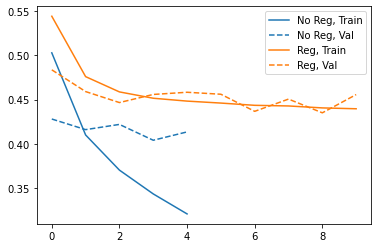

In [144]:
plt.figure()
plt.plot(history.history['categorical_crossentropy'],'C0-',label='No Reg, Train')
plt.plot(history.history['val_categorical_crossentropy'],'C0--',label='No Reg, Val')
plt.plot(history_reg.history['categorical_crossentropy'],'C1-',label='Reg, Train')
plt.plot(history_reg.history['val_categorical_crossentropy'],'C1--',label='Reg, Val')
plt.legend()

---
Problem 2
---------
Let's demonstrate an extreme case of overfitting. Restrict your training data to just a few batches. What happens?

---

In [115]:
small_train = train_dataset[:100]
small_labels = train_labels[:100]

In [132]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(784)))
model.add(tf.keras.layers.Dense(784,activation='relu'))
model.add(tf.keras.layers.Dense(10))
model.compile(optimizer='adam',loss=loss_fn)
small = model.fit(small_train,small_labels,epochs=100,verbose=0,validation_data=(valid_dataset,valid_labels))

Epoch 1/100
4/4 [==============================] - 0s 81ms/step - loss: 2.0336 - val_loss: 1.4025
Epoch 2/100
4/4 [==============================] - 0s 62ms/step - loss: 0.6667 - val_loss: 1.2026
Epoch 3/100
4/4 [==============================] - 0s 63ms/step - loss: 0.3651 - val_loss: 1.0994
Epoch 4/100
4/4 [==============================] - 0s 62ms/step - loss: 0.1888 - val_loss: 1.1086
Epoch 5/100
4/4 [==============================] - 0s 64ms/step - loss: 0.1244 - val_loss: 1.1582
Epoch 6/100
4/4 [==============================] - 0s 64ms/step - loss: 0.0851 - val_loss: 1.1333
Epoch 7/100
4/4 [==============================] - 0s 61ms/step - loss: 0.0474 - val_loss: 1.1096
Epoch 8/100
4/4 [==============================] - 0s 65ms/step - loss: 0.0333 - val_loss: 1.1005
Epoch 9/100
4/4 [==============================] - 0s 62ms/step - loss: 0.0223 - val_loss: 1.1015
Epoch 10/100
4/4 [==============================] - 0s 63ms/step - loss: 0.0186 - val_loss: 1.1099
Epoch 11/100
4/4 [=

4/4 [==============================] - 0s 64ms/step - loss: 7.5521e-04 - val_loss: 1.2133
Epoch 84/100
4/4 [==============================] - 0s 62ms/step - loss: 7.4027e-04 - val_loss: 1.2148
Epoch 85/100
4/4 [==============================] - 0s 63ms/step - loss: 7.2741e-04 - val_loss: 1.2163
Epoch 86/100
4/4 [==============================] - 0s 62ms/step - loss: 7.1514e-04 - val_loss: 1.2179
Epoch 87/100
4/4 [==============================] - 0s 65ms/step - loss: 7.0129e-04 - val_loss: 1.2192
Epoch 88/100
4/4 [==============================] - 0s 65ms/step - loss: 6.9079e-04 - val_loss: 1.2205
Epoch 89/100
4/4 [==============================] - 0s 63ms/step - loss: 6.7922e-04 - val_loss: 1.2213
Epoch 90/100
4/4 [==============================] - 0s 63ms/step - loss: 6.6964e-04 - val_loss: 1.2216
Epoch 91/100
4/4 [==============================] - 0s 62ms/step - loss: 6.5928e-04 - val_loss: 1.2223
Epoch 92/100
4/4 [==============================] - 0s 59ms/step - loss: 6.4869e-04 - 

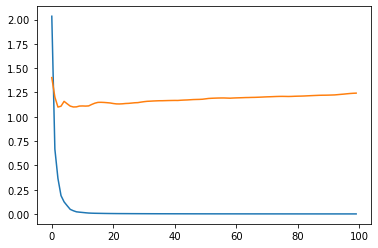

In [135]:
plt.figure()
plt.plot(small.history['loss'])
plt.plot(small.history['val_loss'])

---
Problem 3
---------
Introduce Dropout on the hidden layer of the neural network. Remember: Dropout should only be introduced during training, not evaluation, otherwise your evaluation results would be stochastic as well. TensorFlow provides `nn.dropout()` for that, but you have to make sure it's only inserted during training.

What happens to our extreme overfitting case?

---

In [148]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(784,)))
model.add(tf.keras.layers.Dense(784,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10))

model.compile(optimizer='adam',loss=loss_fn,metrics=['accuracy'])

In [155]:
drop = model.fit(train_dataset,train_labels,epochs=10,validation_data=(valid_dataset,valid_labels))

Epoch 1/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.4840 - accuracy: 0.8681 - val_loss: 0.4327 - val_accuracy: 0.8869
Epoch 2/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.4745 - accuracy: 0.8708 - val_loss: 0.4418 - val_accuracy: 0.8841
Epoch 3/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.4621 - accuracy: 0.8732 - val_loss: 0.4369 - val_accuracy: 0.8846
Epoch 4/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.4538 - accuracy: 0.8752 - val_loss: 0.4127 - val_accuracy: 0.8929
Epoch 5/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.4425 - accuracy: 0.8780 - val_loss: 0.4047 - val_accuracy: 0.8952
Epoch 6/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.4372 - accuracy: 0.8789 - val_loss: 0.4145 - val_accuracy: 0.8920
Epoch 7/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.4274 - accuracy: 0.8816 - val_loss: 0.4105 - val_ac

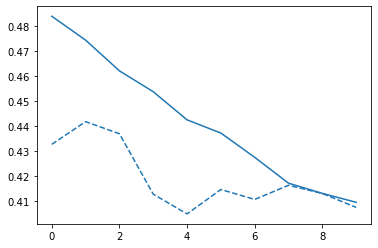

In [168]:
plt.figure()
plt.plot(drop.history['loss'],'C0-')
plt.plot(drop.history['val_loss'],'C0--')

---
Problem 4
---------

Try to get the best performance you can using a multi-layer model! The best reported test accuracy using a deep network is [97.1%](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html?showComment=1391023266211#c8758720086795711595).

One avenue you can explore is to add multiple layers.

Another one is to use learning rate decay:

    global_step = tf.Variable(0)  # count the number of steps taken.
    learning_rate = tf.train.exponential_decay(0.5, global_step, ...)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
 
 ---


In [164]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(784,)))
model.add(tf.keras.layers.Dense(784,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(784,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10))

model.compile(optimizer='adam',loss=loss_fn,metrics=['accuracy',loss_fn])

In [165]:
best = model.fit(train_dataset,train_labels,epochs=20,validation_data=(valid_dataset,valid_labels))

Epoch 1/20
6250/6250 [==============================] - 32s 5ms/step - loss: 0.8260 - accuracy: 0.8182 - categorical_crossentropy: 0.6060 - val_loss: 0.7398 - val_accuracy: 0.8524 - val_categorical_crossentropy: 0.4829
Epoch 2/20
6250/6250 [==============================] - 31s 5ms/step - loss: 0.8214 - accuracy: 0.8323 - categorical_crossentropy: 0.5562 - val_loss: 0.7324 - val_accuracy: 0.8610 - val_categorical_crossentropy: 0.4656
Epoch 3/20
6250/6250 [==============================] - 31s 5ms/step - loss: 0.8112 - accuracy: 0.8354 - categorical_crossentropy: 0.5451 - val_loss: 0.7140 - val_accuracy: 0.8604 - val_categorical_crossentropy: 0.4514
Epoch 4/20
6250/6250 [==============================] - 32s 5ms/step - loss: 0.7908 - accuracy: 0.8371 - categorical_crossentropy: 0.5385 - val_loss: 0.6925 - val_accuracy: 0.8659 - val_categorical_crossentropy: 0.4488
Epoch 5/20
6250/6250 [==============================] - 32s 5ms/step - loss: 0.7685 - accuracy: 0.8387 - categorical_crossen

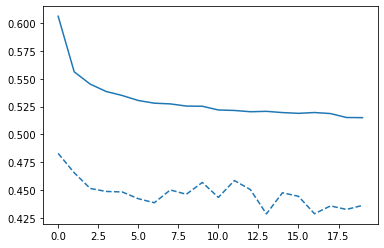

In [167]:
plt.figure()
plt.plot(best.history['categorical_crossentropy'],'C0-')
plt.plot(best.history['val_categorical_crossentropy'],'C0--')